<h2 style = "color : Purple">Multiple Linear Regression Assignment</h2>

In [734]:
# Import required libraries and check columns, size and info of the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [735]:
import warnings
warnings.filterwarnings('ignore')

In [736]:
byke_df = pd.read_csv('day.csv')

In [737]:
byke_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [738]:
byke_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [739]:
byke_df.shape

(730, 16)

In [740]:
byke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [741]:
byke_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<h4 style = "color : orange">From above it looks like - 
    there are no missing values at all. So no need to drop records and perform data interpretation</h4> 

In [742]:
byke_df[byke_df.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


<h4 style = "color : orange">There are no duplicate rows in the dataset.</h4> 

In [743]:
byke_df['instant'].value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

<h4 style = "color : orange"><b>instant :</b> It seems that instant column is only an index value and does not make any meaning for model. So let's drop that column.</h4>

<h4 style = "color : orange">dteday : Also this is the date and we have separate columns for year & month, hence this is kind of duplicate column. We can drop this column too.</h4> 

In [744]:
byke_df.drop(['instant','dteday'], axis=1, inplace=True)

In [745]:
# We can confirm that instant & dteday column is deleted beacause we are not able to see both columns in the dataset
byke_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [746]:
# Rename month & year column with proper name for better readability
byke_df.rename(columns={'mnth' : 'month'}, inplace=True)
byke_df.rename(columns={'yr' : 'year'}, inplace=True)

<h3 style = "color : Magenta">Univariate Analysis</h3>

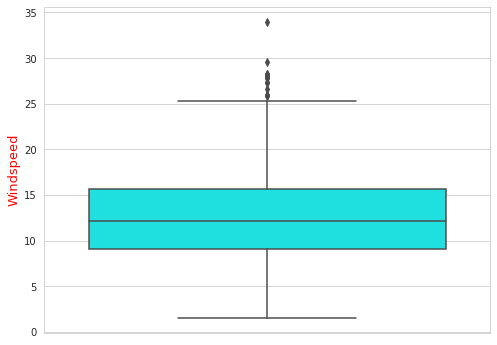

In [747]:
plt.figure(figsize=(8,6))
sns.boxplot(y="windspeed", data=byke_df, color="Cyan")
plt.ylabel("Windspeed", fontdict={"color" : "red", "fontsize": 13})
plt.show()

<h4 style = "color : orange">It seems that Windspeed is having outliers on top side of the dataset.</h4> 

In [748]:
Q1 = byke_df["windspeed"].quantile(0.25)
Q3 = byke_df["windspeed"].quantile(0.75)
IQR = Q3 - Q1
IQR

6.58393925

In [749]:
byke_df[byke_df["windspeed"] > (Q3 + 1.5 * IQR)]

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,1,0,2,0,1,1,1,17.015000,19.91750,37.5833,27.999836,208,1705,1913
49,1,0,2,0,6,0,1,16.365847,19.57020,18.7917,34.000021,532,1103,1635
93,2,0,4,0,1,1,1,23.506653,27.14645,42.6250,25.833257,734,2381,3115
94,2,0,4,0,2,1,2,16.980847,19.91750,64.2083,26.000489,167,1628,1795
292,4,0,10,0,4,1,1,19.509153,23.32625,63.6250,28.292425,471,3724,4195
382,1,1,1,0,3,1,1,12.436653,13.76270,44.3333,27.833743,109,3267,3376
407,1,1,2,0,0,0,1,5.227500,5.08290,46.4583,27.417204,73,1456,1529
420,1,1,2,0,6,0,1,11.924153,12.78375,39.5833,28.250014,317,2415,2732
431,1,1,3,0,4,1,1,21.627500,26.23020,56.7500,29.584721,486,4896,5382
432,1,1,3,0,5,1,2,16.844153,19.85415,40.7083,27.791600,447,4122,4569


In [750]:
# Treating outliers for windspeed
byke_df = byke_df[~(byke_df["windspeed"] > (Q3 + 1.5 * IQR))]

In [751]:
byke_df.shape

(717, 14)

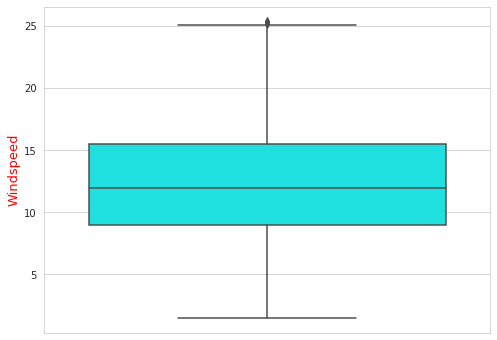

In [752]:
# Let's verify whether outliers are removed or not by plotting box plot
plt.figure(figsize=(8,6))
sns.boxplot(y="windspeed", data=byke_df, color="Cyan")
plt.ylabel("Windspeed", fontdict={"color" : "red", "fontsize": 13})
plt.show()

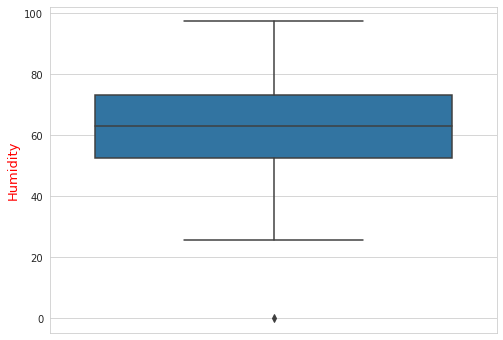

In [753]:
plt.figure(figsize=(8,6))
sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(y="hum", data=byke_df)
plt.ylabel("Humidity", fontdict = {"color" : "red", "fontsize": 13})
plt.show()

In [754]:
Q1 = byke_df["hum"].quantile(0.25)
Q3 = byke_df["hum"].quantile(0.75)
IQR = Q3 - Q1
IQR

20.7917

In [755]:
byke_df[byke_df["hum"] < (Q1 - 1.5 * IQR)]

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,1,0,3,0,4,1,3,15.952731,19.2834,0.0,17.545759,46,577,623


In [756]:
# Treating outliers for Humidity
byke_df = byke_df[~(byke_df["hum"] < (Q1 - 1.5 * IQR))]

In [757]:
byke_df.shape

(716, 14)

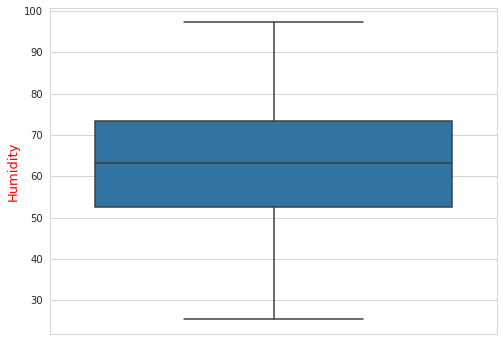

In [758]:
# Let's verify whether outliers are removed or not by plotting box plot
plt.figure(figsize=(8,6))
sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(y="hum", data=byke_df)
plt.ylabel("Humidity", fontdict = {"color" : "red", "fontsize": 13})
plt.show()

<h4 style = "color : orange">cnt: column 'cnt' is sum of 'casual' and 'registered' columns. Hence we can drop off 'casual' and 'registered' column and we could live without this column</h4> 

In [759]:
byke_df.drop(['casual', 'registered'], axis=1, inplace=True)

In [760]:
# We can confirm that casual & registered column is deleted beacause we are not able to see both columns in the dataset
byke_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [761]:
byke_df.shape

(716, 12)

<h4 style = "color : orange"> "weathersit" is a category type feature whereas by looking into dataset we found that type for "weathersit" is "int64". So let's define different categories for weathersit</h4>

In [762]:
# Dictionary for different types of weathersit
# weathersit_A = 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# weathersit_B = 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# weathersit_C = 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# weathersit_D = 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = 
weathersit_dict = {1: 'weathersit_A', 2: 'weathersit_B', 3: 'weathersit_C', 4: 'weathersit_D'}

In [763]:
byke_df['weathersit'] = byke_df['weathersit'].map(weathersit_dict)

In [764]:
byke_df['weathersit'].astype('category').value_counts()

weathersit_A    453
weathersit_B    243
weathersit_C     20
Name: weathersit, dtype: int64

<h4 style = "color : orange"> "season" is a category type feature whereas by looking into dataset we found that type for "season" is "int64". So let's convert season to different defined categories</h4>

In [765]:
# Season Dictionary
# 1 = spring
# 2 = summer
# 3 = fall
# 4 = winter
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
byke_df['season'] = byke_df['season'].map(season_dict)

In [766]:
# Verify whether conversion is done successfully or not
byke_df['season'].astype('category').value_counts()

fall      188
summer    181
winter    176
spring    171
Name: season, dtype: int64

In [767]:
month_dict = {1 : 'Jan', 2 : 'Feb', 3 :'Mar', 4 :'Apr', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'Aug', 9 : 'Sept', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}
byke_df['month'] = byke_df['month'].map(month_dict)
byke_df['month'].astype('category').value_counts()

Aug     62
July    62
May     62
Dec     61
Jan     61
June    60
Nov     60
Oct     60
Sept    60
Apr     58
Mar     58
Feb     52
Name: month, dtype: int64

In [768]:
weekday_dict = {0 : 'Mon', 1 : 'Tue', 2 :'wed', 3 :'Thur', 4 : 'Fri', 5 : 'Sat', 6 : 'Sun'}
byke_df['weekday'] = byke_df['weekday'].map(weekday_dict)
byke_df['weekday'].astype('category').value_counts()

Mon     103
Sat     103
wed     103
Sun     102
Thur    102
Tue     102
Fri     101
Name: weekday, dtype: int64

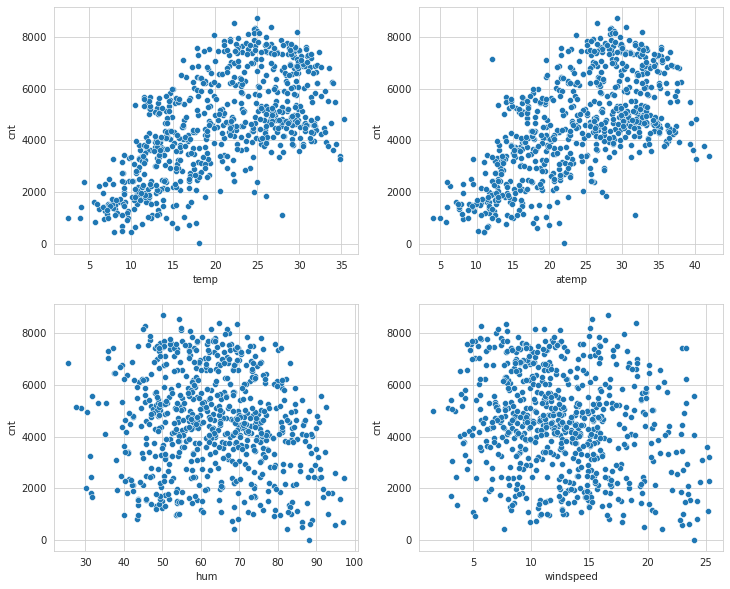

In [769]:
plt.figure(figsize=(12,10))
sns.set_style('whitegrid')
plt.subplot(2, 2, 1)
sns.scatterplot(x = 'temp', y = 'cnt', data = byke_df)
plt.subplot(2, 2 , 2)
sns.scatterplot(x = 'atemp', y= 'cnt', data = byke_df)
plt.subplot(2, 2, 3)
sns.scatterplot(x = 'hum', y = 'cnt', data = byke_df)
plt.subplot(2, 2, 4)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = byke_df)
plt.show()

<h4 style = "color : orange">Above subplots shows that there is linear relation between temp & cnt, and atemp & cnt. Whereas for humidity and windspeed there is no linear relationship at all as points are spread across all the area</h4>

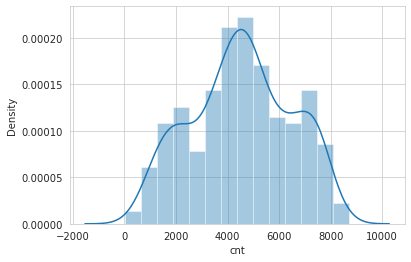

In [770]:
sns.distplot(byke_df['cnt'])
plt.show()

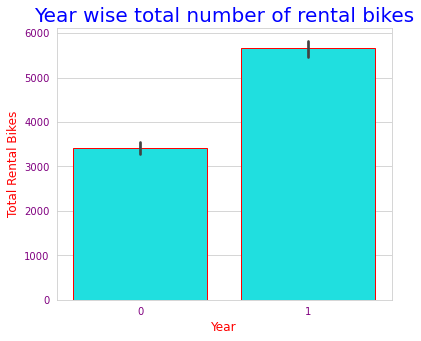

In [771]:
plt.figure(figsize=(6, 5))
sns.barplot(x = 'year', y = 'cnt', data = byke_df, color = 'cyan', edgecolor = 'red')
plt.title('Year wise total number of rental bikes', fontdict={'fontsize':20, 'color':'Blue','fontweight':2})
plt.xlabel('Year', color = 'red', fontdict={'fontsize':12, 'fontweight':2})
plt.xticks(color = 'purple')
plt.ylabel('Total Rental Bikes', color = 'red', fontdict={'fontsize':12, 'fontweight':2})
plt.yticks(color = 'purple')
plt.show()

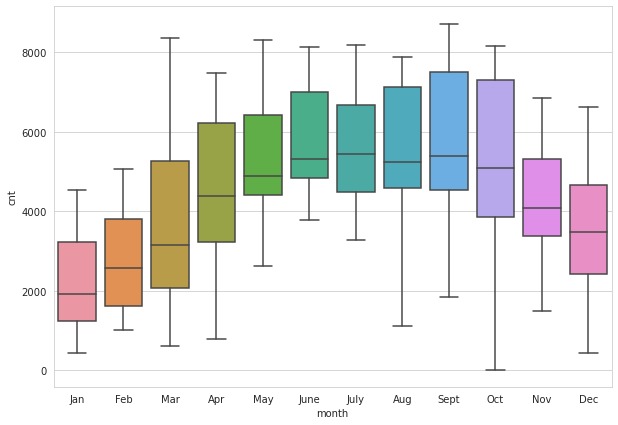

In [772]:
plt.figure(figsize=(10, 7))
sns.boxplot(x= 'month', y= 'cnt', data= byke_df)
plt.show()

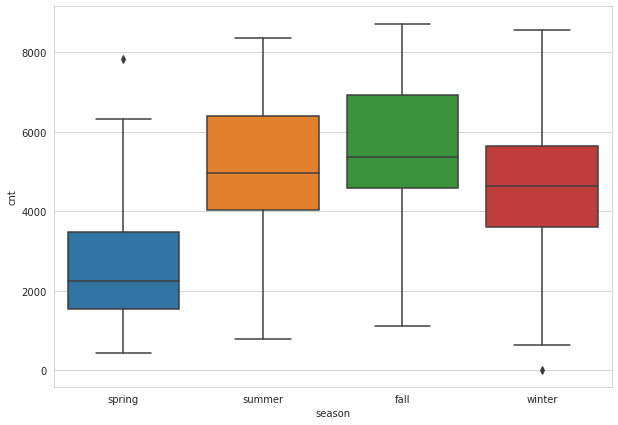

In [773]:
plt.figure(figsize=(10, 7))
sns.boxplot(x= 'season', y= 'cnt', data= byke_df)
plt.show()

<h3 style = "color : Magenta">Bivariate Analysis</h3> 

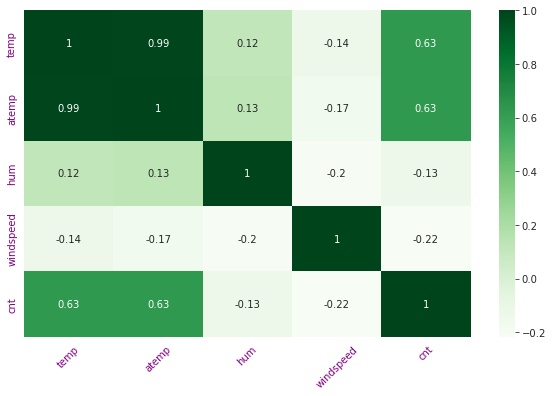

In [774]:
plt.figure(figsize=(10,6))
byke_df_numeric = byke_df[['temp','atemp','hum','windspeed','cnt']].corr()
round(byke_df_numeric, 3)
plt.xticks(rotation=45, color='Purple')
plt.yticks(rotation=45, color='Purple')
sns.heatmap(byke_df_numeric, cmap='Greens', annot=True)
plt.show()

<h4 style = "color : orange">The heatmap shows some useful insights:
    
    - Count is negatively correlated to 'windspeed' with -0.22. This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.
   
    -  'atemp' and 'temp' are highly (positively) correlated. The correlation between the two is almost equal to 1. So this is a kind of multicollinearity
</h4>

In [775]:
# Removing atemp as it is highly correlated with temp
byke_df.drop(columns=['atemp'], axis=1, inplace=True)

In [776]:
byke_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

<h3 style = "color : Magenta">Preparing the data for modeling</h3> 

In [777]:
# Creating dummy variables for weathersit
weathersit_status = pd.get_dummies(byke_df['weathersit'])

In [778]:
weathersit_status.head()

,weathersit_A,weathersit_B,weathersit_C
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


<h4 style = "color : orange">Now you don't need three columns. We can drop weathersit_A column, as weathersit_A can be identified with weathersit_B and weathersit_C with following combination:
    
    - 00 will correspond to weathersit_A
    - 10 will correspond to weathersit_B
    - 01 will correspond to weathersit_C
</h4>

In [779]:
# Drop redundant dummy variable weathersit_C
weathersit_status = pd.get_dummies(byke_df['weathersit'], drop_first = True)

In [780]:
# Concat the dummy dataframe with original bike sharing dataframe
byke_df = pd.concat([byke_df, weathersit_status], axis=1)

In [781]:
byke_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weathersit_B,weathersit_C
0,spring,0,Jan,0,Sun,0,weathersit_B,14.110847,80.5833,10.749882,985,1,0
1,spring,0,Jan,0,Mon,0,weathersit_B,14.902598,69.6087,16.652113,801,1,0
2,spring,0,Jan,0,Tue,1,weathersit_A,8.050924,43.7273,16.636703,1349,0,0
3,spring,0,Jan,0,wed,1,weathersit_A,8.200000,59.0435,10.739832,1562,0,0
4,spring,0,Jan,0,Thur,1,weathersit_A,9.305237,43.6957,12.522300,1600,0,0


In [782]:
# Still we can see weathersit column in dataframe. We need to drop this as we can not use categorical variables for model
byke_df.drop(columns=['weathersit'], inplace=True)

In [783]:
byke_df.head()

,season,year,month,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_B,weathersit_C
0,spring,0,Jan,0,Sun,0,14.110847,80.5833,10.749882,985,1,0
1,spring,0,Jan,0,Mon,0,14.902598,69.6087,16.652113,801,1,0
2,spring,0,Jan,0,Tue,1,8.050924,43.7273,16.636703,1349,0,0
3,spring,0,Jan,0,wed,1,8.200000,59.0435,10.739832,1562,0,0
4,spring,0,Jan,0,Thur,1,9.305237,43.6957,12.522300,1600,0,0


In [784]:
# Creating dummy variables for season
season_df = pd.get_dummies(byke_df['season'], drop_first=True)
# Concat the dummy dataframe with original bike sharing dataframe
byke_df = pd.concat([byke_df, season_df], axis=1)
byke_df.head()

,season,year,month,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_B,weathersit_C,spring,summer,winter
0,spring,0,Jan,0,Sun,0,14.110847,80.5833,10.749882,985,1,0,1,0,0
1,spring,0,Jan,0,Mon,0,14.902598,69.6087,16.652113,801,1,0,1,0,0
2,spring,0,Jan,0,Tue,1,8.050924,43.7273,16.636703,1349,0,0,1,0,0
3,spring,0,Jan,0,wed,1,8.200000,59.0435,10.739832,1562,0,0,1,0,0
4,spring,0,Jan,0,Thur,1,9.305237,43.6957,12.522300,1600,0,0,1,0,0


<h4 style = "color : orange">Same as weathersit we don't need four columns for season. We can drop 'fall' column, as fall can be identified with following combination:
    
    - 000 will correspond to fall
    - 100 will correspond to spring
    - 010 will correspond to summer
    - 001 will correspond to winter
</h4>

In [785]:
# we can see season column in dataframe. We need to drop this as we can not use categorical variables for model
byke_df.drop(columns=['season'], inplace=True)
byke_df.head()

,year,month,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_B,weathersit_C,spring,summer,winter
0,0,Jan,0,Sun,0,14.110847,80.5833,10.749882,985,1,0,1,0,0
1,0,Jan,0,Mon,0,14.902598,69.6087,16.652113,801,1,0,1,0,0
2,0,Jan,0,Tue,1,8.050924,43.7273,16.636703,1349,0,0,1,0,0
3,0,Jan,0,wed,1,8.200000,59.0435,10.739832,1562,0,0,1,0,0
4,0,Jan,0,Thur,1,9.305237,43.6957,12.522300,1600,0,0,1,0,0


In [786]:
# Creating dummy variables for month feature
month_df = pd.get_dummies(byke_df['month'], drop_first=True)

In [787]:
byke_df = pd.concat([byke_df,month_df], axis=1)
byke_df.head()

,year,month,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_B,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,Jan,0,Sun,0,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Mon,0,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Tue,1,8.050924,43.7273,16.636703,1349,0,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,wed,1,8.200000,59.0435,10.739832,1562,0,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Thur,1,9.305237,43.6957,12.522300,1600,0,...,0,0,1,0,0,0,0,0,0,0


In [788]:
byke_df.drop(columns=['month'], inplace=True)
byke_df.head()

,year,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_B,weathersit_C,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,Sun,0,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Mon,0,14.902598,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Tue,1,8.050924,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,wed,1,8.200000,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Thur,1,9.305237,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0


In [789]:
# Creating dummy variables for weekday feature
weekday_df = pd.get_dummies(byke_df['weekday'], drop_first=True)

In [790]:
byke_df = pd.concat([byke_df,weekday_df], axis=1)
byke_df.head()

,year,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_B,weathersit_C,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,wed
0,0,0,Sun,0,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,Mon,0,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,Tue,1,8.050924,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,wed,1,8.200000,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,Thur,1,9.305237,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [791]:
byke_df.drop(columns=['weekday'], inplace=True)
byke_df.head()

,year,holiday,workingday,temp,hum,windspeed,cnt,weathersit_B,weathersit_C,spring,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [792]:
byke_df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'weathersit_B', 'weathersit_C', 'spring', 'summer', 'winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sept',
       'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'wed'],
      dtype='object')

<h3 style = "color : Magenta">Splitting data into train and test</h3> 

In [793]:
byke_train_df, byke_test_df = train_test_split(byke_df, train_size= 0.75, random_state=333)
print(byke_train_df.shape)
print(byke_test_df.shape)

(537, 29)
(179, 29)


In [794]:
byke_df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'weathersit_B', 'weathersit_C', 'spring', 'summer', 'winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sept',
       'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'wed'],
      dtype='object')

In [795]:
# Rescaling the features - It is important in case of multiple linear regression
scaler = MinMaxScaler()
# Create a list of numeric variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
# Fit on training data
byke_train_df[num_vars] = scaler.fit_transform(byke_train_df[num_vars])

In [796]:
byke_train_df.head()

,year,holiday,workingday,temp,hum,windspeed,cnt,weathersit_B,weathersit_C,spring,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,wed
192,0,0,1,0.931366,0.424594,0.505303,0.462031,0,0,0,...,0,0,0,0,0,0,0,0,0,1
340,0,0,1,0.444587,0.997100,0.692583,0.033080,0,1,0,...,0,0,0,0,0,0,0,1,0,0
721,1,0,0,0.236571,0.363689,0.314472,0.163709,0,0,1,...,0,0,0,0,1,0,0,0,0,0
246,0,0,0,0.823663,0.679234,0.522954,0.544368,0,0,0,...,0,0,0,1,1,0,0,0,0,0
237,0,0,1,0.812047,0.705916,0.174921,0.510685,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [797]:
byke_train_df[num_vars].describe()

,temp,hum,windspeed,cnt
count,537.000000,537.000000,537.000000,537.000000
mean,0.555222,0.526976,0.462872,0.504339
std,0.227353,0.191723,0.201064,0.231368
min,0.000000,0.000000,0.000000,0.000000
25%,0.360114,0.386311,0.318012,0.352529
50%,0.568130,0.529582,0.441702,0.506821
75%,0.753972,0.664153,0.590072,0.686587
max,1.000000,1.000000,1.000000,1.000000


In [798]:
# It seems that temp is having high correlation with cnt. So let's try to build model using temp feature
y_train = byke_train_df.pop('cnt')
X_train = byke_train_df

Don't consider June as significance level is increased to 0.999

In [799]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select= 15)
# Fit with 7 features
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [800]:
col1 = X_train.columns[rfe.support_]
X_train_rfe = X_train[col1]
X_train_rfe = sm.add_constant(X_train_rfe)
ln_model = sm.OLS(y_train, X_train_rfe).fit()   
print(ln_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          8.11e-203
Time:                        01:08:35   Log-Likelihood:                 532.69
No. Observations:                 537   AIC:                            -1033.
Df Residuals:                     521   BIC:                            -964.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2954      0.027     10.791   

In [801]:
X_train_rfe_new = X_train_rfe.drop(columns=['const'], axis=1)

In [802]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.86
2,temp,13.05
4,windspeed,5.38
8,winter,2.68
5,weathersit_B,2.59
7,spring,2.25
0,year,2.10
12,Nov,1.77
9,Dec,1.49
10,July,1.41


In [803]:
X_train_rfe.drop(columns=['hum'], axis=1, inplace=True)
X_train_rfe.head()

,const,year,holiday,temp,windspeed,weathersit_B,weathersit_C,spring,winter,Dec,July,Mar,Nov,Sept,Mon
192,1.0,0,0,0.931366,0.505303,0,0,0,0,0,1,0,0,0,0
340,1.0,0,0,0.444587,0.692583,0,1,0,1,1,0,0,0,0,0
721,1.0,1,0,0.236571,0.314472,0,0,1,0,1,0,0,0,0,1
246,1.0,0,0,0.823663,0.522954,0,0,0,0,0,0,0,0,1,1
237,1.0,0,0,0.812047,0.174921,0,0,0,0,0,0,0,0,0,0


In [804]:
X_train_rfe = sm.add_constant(X_train_rfe)
ln_model = sm.OLS(y_train, X_train_rfe).fit()   
print(ln_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     199.1
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          7.96e-199
Time:                        01:08:36   Log-Likelihood:                 520.41
No. Observations:                 537   AIC:                            -1011.
Df Residuals:                     522   BIC:                            -946.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2424      0.026      9.418   

In [805]:
X_train_rfe_new = X_train_rfe.drop(columns=['const'], axis=1)

In [806]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.62
3,windspeed,5.33
7,winter,2.44
0,year,2.07
6,spring,1.80
11,Nov,1.76
4,weathersit_B,1.55
8,Dec,1.45
9,July,1.37
10,Mar,1.22


In [807]:
byke_df[['winter','temp','year','Nov','Dec','spring','Sept','holiday','weathersit_B','weathersit_C','cnt']].corr()

,winter,temp,year,Nov,Dec,spring,Sept,holiday,weathersit_B,weathersit_C,cnt
winter,1.000000,-0.234184,0.001595,0.529742,0.290544,-0.319786,0.014650,0.016110,0.029239,0.100076,0.057982
temp,-0.234184,1.000000,0.055775,-0.211518,-0.286990,-0.618756,0.195942,-0.030845,-0.102507,-0.057193,0.625421
year,0.001595,0.055775,1.000000,0.000845,-0.004150,-0.008262,0.000845,0.008763,-0.006847,-0.067333,0.576941
Nov,0.529742,-0.211518,0.000845,1.000000,-0.092293,-0.169404,-0.091463,0.066923,-0.057091,0.040501,-0.045332
Dec,0.290544,-0.286990,-0.004150,-0.092293,1.000000,0.075465,-0.092293,0.006253,0.066537,0.039350,-0.174748
spring,-0.319786,-0.618756,-0.008262,-0.169404,0.075465,1.000000,-0.169404,0.038530,0.041267,-0.035316,-0.559414
Sept,0.014650,0.195942,0.000845,-0.091463,-0.092293,-0.169404,1.000000,0.007176,0.038715,0.040501,0.192634
holiday,0.016110,-0.030845,0.008763,0.066923,0.006253,0.038530,0.007176,1.000000,-0.019703,-0.029466,-0.072164
weathersit_B,0.029239,-0.102507,-0.006847,-0.057091,0.066537,0.041267,0.038715,-0.019703,1.000000,-0.121502,-0.180554
weathersit_C,0.100076,-0.057193,-0.067333,0.040501,0.039350,-0.035316,0.040501,-0.029466,-0.121502,1.000000,-0.234780


In [808]:
X_train_rfe.drop(columns=['spring'], axis=1, inplace=True)
X_train_rfe.head()

,const,year,holiday,temp,windspeed,weathersit_B,weathersit_C,winter,Dec,July,Mar,Nov,Sept,Mon
192,1.0,0,0,0.931366,0.505303,0,0,0,0,1,0,0,0,0
340,1.0,0,0,0.444587,0.692583,0,1,1,1,0,0,0,0,0
721,1.0,1,0,0.236571,0.314472,0,0,0,1,0,0,0,0,1
246,1.0,0,0,0.823663,0.522954,0,0,0,0,0,0,0,1,1
237,1.0,0,0,0.812047,0.174921,0,0,0,0,0,0,0,0,0


In [809]:
X_train_rfe = sm.add_constant(X_train_rfe)
ln_model = sm.OLS(y_train, X_train_rfe).fit()   
print(ln_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     175.3
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          5.46e-181
Time:                        01:08:36   Log-Likelihood:                 475.27
No. Observations:                 537   AIC:                            -922.5
Df Residuals:                     523   BIC:                            -862.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0686      0.020      3.390   

In [810]:
X_train_rfe_new = X_train_rfe.drop(columns=['const'], axis=1)

In [811]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.08
3,windspeed,4.22
6,winter,2.33
0,year,2.00
10,Nov,1.75
4,weathersit_B,1.53
7,Dec,1.43
8,July,1.37
11,Sept,1.21
12,Mon,1.16


In [812]:
X_train_rfe.drop(columns=['Mar'], axis=1, inplace=True)
X_train_rfe.head()

,const,year,holiday,temp,windspeed,weathersit_B,weathersit_C,winter,Dec,July,Nov,Sept,Mon
192,1.0,0,0,0.931366,0.505303,0,0,0,0,1,0,0,0
340,1.0,0,0,0.444587,0.692583,0,1,1,1,0,0,0,0
721,1.0,1,0,0.236571,0.314472,0,0,0,1,0,0,0,1
246,1.0,0,0,0.823663,0.522954,0,0,0,0,0,0,1,1
237,1.0,0,0,0.812047,0.174921,0,0,0,0,0,0,0,0


In [813]:
X_train_rfe = sm.add_constant(X_train_rfe)
ln_model = sm.OLS(y_train, X_train_rfe).fit()   
print(ln_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     189.8
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          6.98e-182
Time:                        01:08:37   Log-Likelihood:                 474.67
No. Observations:                 537   AIC:                            -923.3
Df Residuals:                     524   BIC:                            -867.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0729      0.020      3.680   

In [814]:
X_train_rfe_new = X_train_rfe.drop(columns=['const'], axis=1)

In [815]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.04
3,windspeed,4.00
6,winter,2.32
0,year,2.00
9,Nov,1.75
4,weathersit_B,1.52
7,Dec,1.43
8,July,1.36
10,Sept,1.21
11,Mon,1.16


In [816]:
X_train_rfe.drop(columns=['windspeed'], axis=1, inplace=True)
X_train_rfe.head()

,const,year,holiday,temp,weathersit_B,weathersit_C,winter,Dec,July,Nov,Sept,Mon
192,1.0,0,0,0.931366,0,0,0,0,1,0,0,0
340,1.0,0,0,0.444587,0,1,1,1,0,0,0,0
721,1.0,1,0,0.236571,0,0,0,1,0,0,0,1
246,1.0,0,0,0.823663,0,0,0,0,0,0,1,1
237,1.0,0,0,0.812047,0,0,0,0,0,0,0,0


In [817]:
X_train_rfe = sm.add_constant(X_train_rfe)
ln_model = sm.OLS(y_train, X_train_rfe).fit()   
print(ln_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          3.27e-182
Time:                        01:08:37   Log-Likelihood:                 472.68
No. Observations:                 537   AIC:                            -921.4
Df Residuals:                     525   BIC:                            -869.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0477      0.015      3.144   

In [818]:
X_train_rfe_new = X_train_rfe.drop(columns=['const'], axis=1)

In [819]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.94
5,winter,2.31
0,year,1.97
8,Nov,1.72
3,weathersit_B,1.47
6,Dec,1.41
7,July,1.32
9,Sept,1.20
10,Mon,1.13
1,holiday,1.05


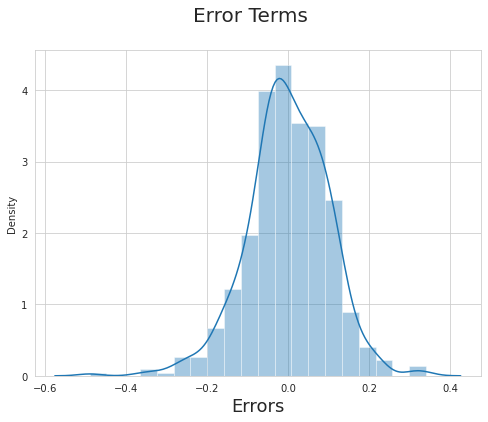

In [820]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8, 6))
y_train_pred = ln_model.predict(X_train_rfe)
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [821]:
# Predictions and evaluations on the test set
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
# Transform on test data set
byke_test_df[num_vars] = scaler.transform(byke_test_df[num_vars])
byke_test_df[num_vars].describe()

,temp,hum,windspeed,cnt
count,179.000000,179.000000,179.000000,179.000000
mean,0.556566,0.519231,0.473985,0.469651
std,0.248754,0.200099,0.213247,0.237681
min,0.047379,0.030161,0.056571,-0.049378
25%,0.303599,0.352958,0.319793,0.269226
50%,0.561794,0.501160,0.450532,0.477967
75%,0.786705,0.669953,0.598956,0.643064
max,1.016896,0.954151,1.010583,0.961487


In [822]:
y_test = byke_test_df.pop('cnt')
X_test = byke_test_df

In [827]:
X_train_rfe_new.columns

Index(['year', 'holiday', 'temp', 'weathersit_B', 'weathersit_C', 'winter',
       'Dec', 'July', 'Nov', 'Sept', 'Mon'],
      dtype='object')

In [823]:
X_test = X_test[X_train_rfe_new.columns]

In [824]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = ln_model.predict(X_test_sm)

In [825]:
#Evaluate the r2 score for test set
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7846945691222693

Text(0, 0.5, 'y test pred')

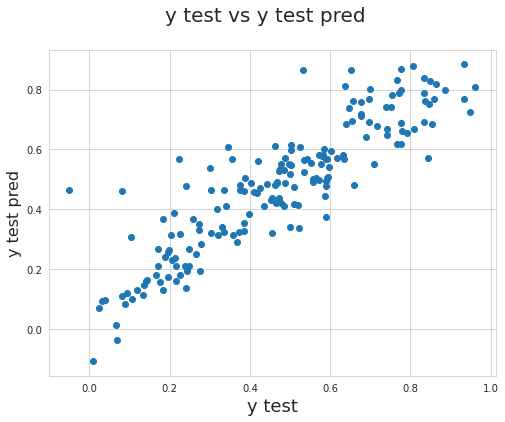

In [826]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
fig.suptitle('y test vs y test pred', fontsize = 20)
plt.xlabel('y test', fontsize = 18)
plt.ylabel('y test pred', fontsize = 16)  